<a href="https://colab.research.google.com/github/rioAgustian/Fisika-Komputasi/blob/main/kuliah-fiskom/RLC_circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rangkaian RLC

Program ini akan dibuat untuk melihat bagaimana perilaku arus listrik pada rangkaian RLC dengan parameter yang diberikan. Persamaan diferensial yang menggambarkan sistem adalah sebagai berikut.


\begin{align}
\frac{d^2q}{dt^2} = \frac{1}{L} \left(\frac{q}{C} + R i - V\right)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# model persamaan diferensial
def dSdt(t, S, C, L, R, V):
   q, i = S
   return [i, - 1/L * (q/C + R*i - V)]

In [3]:
# parameter
C = 1.e-6 # farad
L = 1.e-3 # henry
R = 5     # ohm
V = 10    # volt

# merapikan parameter
params = [C, L, R, V]

In [4]:
# kondisi awal \ initial values
q0 = 0    # coulomb
i0 = 0.2  # ampere

# merapikan kondisi awal
S0 = [q0, i0]

# pewaktuan (detik)
t_min = 0
t_max = 0.005

In [5]:
# menggunakan solve_ivp
sol = solve_ivp(dSdt, t_span=(t_min, t_max), y0=S0, args=params)
t = sol.t
q = sol.y[0, :]
i = sol.y[1, :]

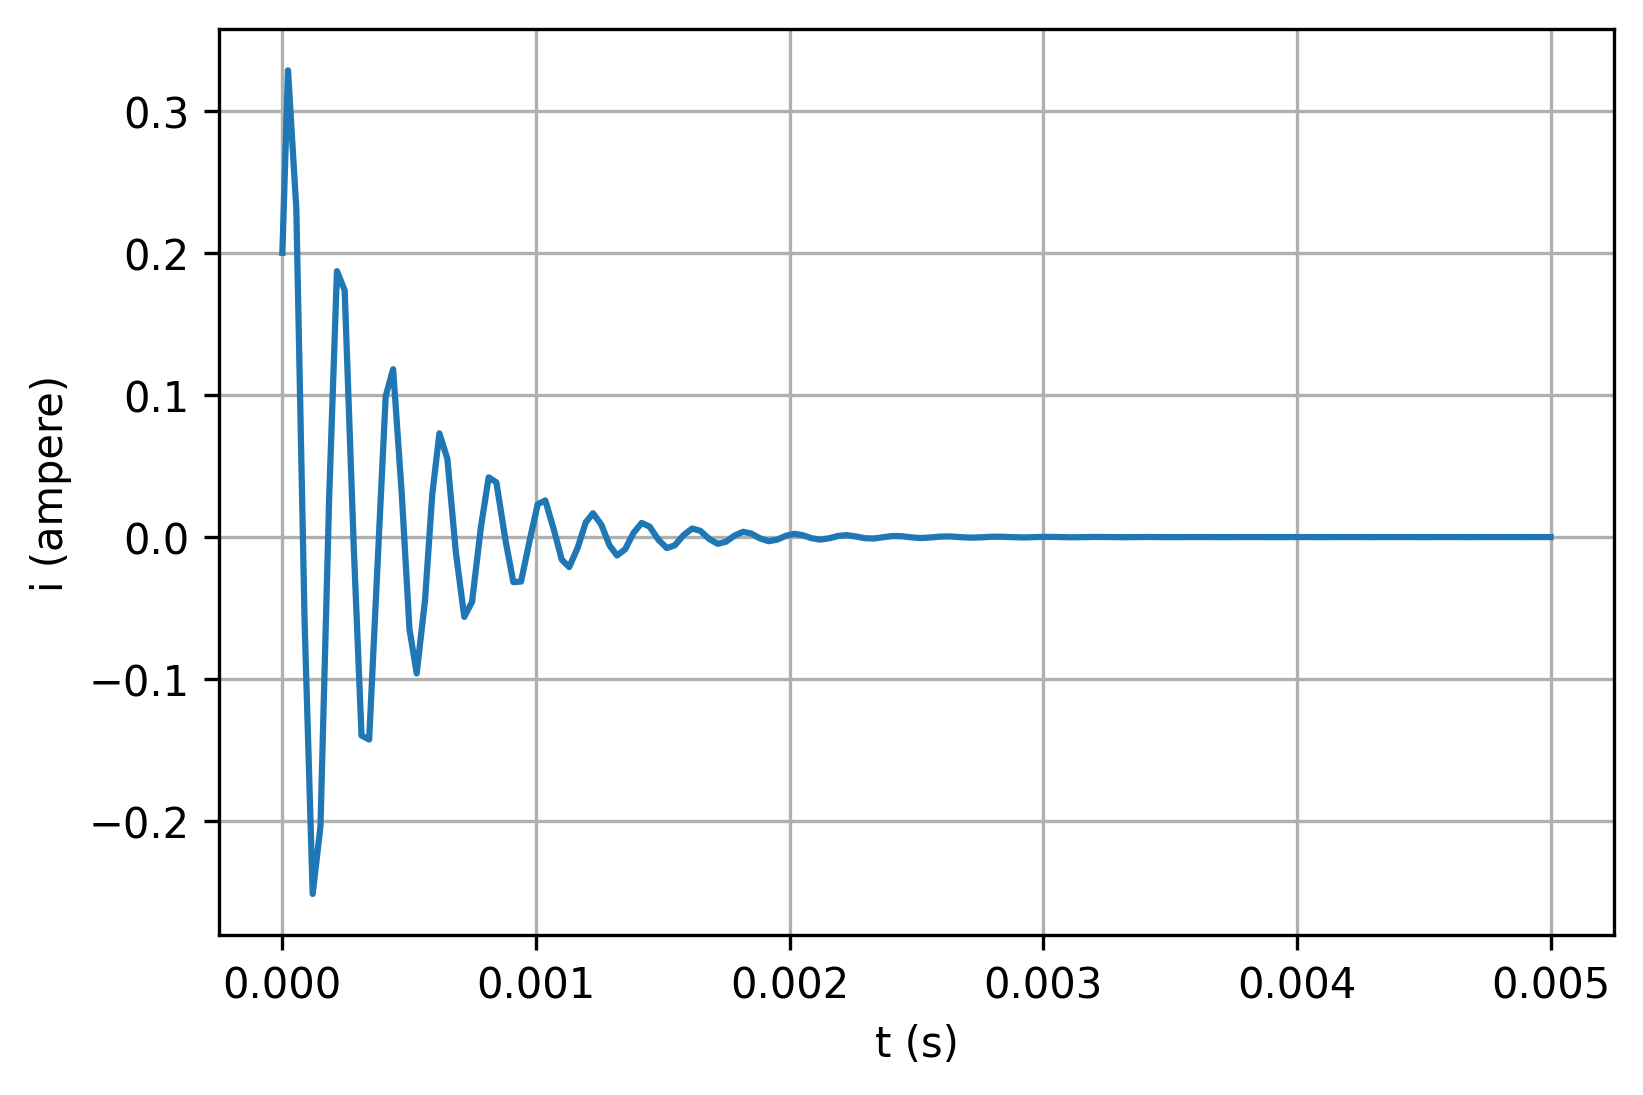

In [6]:
# membuat plot
fig = plt.figure(dpi=300)

# plot arus 
ax = fig.add_subplot(111)
ax.plot(t, i)
ax.set_xlabel("t (s)")
ax.set_ylabel("i (ampere)")
ax.grid()

plt.savefig("test.jpg")
plt.show()